Estudiante 1:

Estudiante 2:

----

# Departamento de Ingeniería Mecánica
## IMEC 2001 - Herramientas Computacionales
### Taller 3 - Sistemas de Ecuaciones Ordinarias
----
### **<span style="color:#A1CCD1;">Condiciones de la entrega </span>**
----
**1. Fechas de entrega:**
- Nota sobre 5.00 ->  <span style="color:red;">1 de Octubre a las 23:59, 2023</span>

**2. Colocar el nombre de los integrantes en la casilla correspondiente<br>**
**3. La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión `.ipynb`)<br>**
**4. El nombre del archivo debe ser:** 
- Si trabajó en parejas:`T#_ApellidosIntegrante1_ApellidosIntegrante2` (Ej: `T#_Salamanca_VargasTorres`)
- Si trabajó individual: `T#_Apellido` (Ej: `T#_VargasTorres`)

**5. Comente el código con el proceso que realizó para llegar a la solución.<br>**
**6. <span style="color:red;"> Si se detecta copia con otro de los talleres enviados, automáticamente la nota para los grupos involucrados es 0. </span>**





<a id="exercise3"></a>
## <font color="#276C9B"> Actividad 1  </font>

En los sistemas dinámicos bidimensionales para algunos casos se tienen los ciclos límite los cuales son una trayectoria cerrada en el espacio. A continuación tiene las ecuaciones de las que debe encontrar la solución para $x$ y $y$:

$$y = - x' + x(1-x^2-y^2)$$
$$-x = -y' + y(1-x^2-y^2)$$ 

El ejercicio que debe realizar consta de los siguientes pasos: 
1. Reescriba la ecuación para que se exprese la primera derivada en términos de x y y. 
3. Especifique como condiciones iniciales:
- x(0) = 0
- y(0) = 1
4. Especifique el tiempo en el que se va a estudiar la respuesta. 
4. Solucione el sistema ode. 
5. Debe realizar una gráfica interactiva teniendo en cuenta la solución encontrada en el literal anterior. Para esto utilice la siguiente función (lo que se encuentra comentado debe completarlo): 

```Python
def f(alpha, t):
    tiempo = # Completar
    sol = # Completar
    
    w = 3
    x = np.linspace(-w, w, 101)
    y = np.linspace(-w, w, 101)
    # full coordinate arrays
    X, Y = np.meshgrid(x, y)
    U = alpha*X - alpha*(X**2 + Y**2)*X - Y
    V = alpha*Y - alpha*(X**2 + Y**2)*Y + X
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(# Completar con la solución encontrada)
    ax.streamplot(X,Y,U,V)

    formato_grafica(# Completar)
 ```
Para poder desplegar la gráfica utilice la siguiente línea de código:
```Python
 interact(f, alpha=(0, 1, 0.1), t=(0, 'Completar', 0.1))
 ```

1. Varie $\alpha$ tres veces y comente los resultados.

Variando $\alpha$, podemos observar lo siguiente:

Cuando  $\alpha$  es pequeño, las líneas de corriente son más curvas y la solución oscila alrededor del origen.

Cuando $\alpha$  es grande, las líneas son más rectas y la solución se aleja del origen más rápidamente.

Cuando $\alpha$  está entre estos dos extremos, las líneas de corriente son una mezcla de curvas y rectas, y la solución se aleja del origen a un ritmo moderado.

2. Varie el tiempo y comente lo que observa. 

Variando el tiempo, podemos observar que la solución se aleja del origen y se mueve en espiral hacia el exterior. A medida que aumenta el tiempo, la espiral se hace cada vez más grande.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


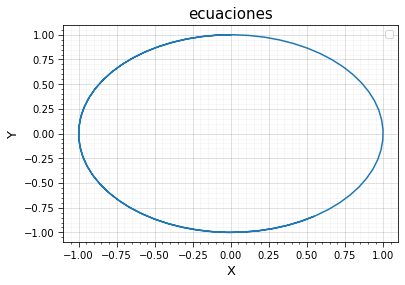

In [39]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact

def ecuaciones(v, t):
    x, y = v
    x_pri = x*(1-x**2-y**2) - y
    y_pri = y*(1-x**2-y**2) + x
    return [x_pri, y_pri]

valores_iniciales = [0, 1]
t = np.linspace(0, 10, 100)

ans = odeint( ecuaciones, valores_iniciales,t)
#print(ans)

def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

plt.plot(ans[:, 0], ans[:, 1])
plt.xlabel('x')
plt.ylabel('y')
formato_grafica(titulo='ecuaciones', 
                ejex='X', 
                ejey='Y',
                leyenda=True)
plt.show()

In [54]:

def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

def f(alpha, t):
    
    def ecuaciones(variables, t):
        x, y = variables
        der_x = x * (1 - x**2 - y**2) - y
        der_y = y * (1 - x**2 - y**2) + x
        return [der_x, der_y]

    condiciones_iniciales = [0, 1] 

    tiempo = np.linspace(0, t, 1000)

    sol = odeint(ecuaciones, condiciones_iniciales, tiempo)
    #print(sol)
    w = 3
    x = np.linspace(-w, w, 101)
    y = np.linspace(-w, w, 101)
    
    X, Y = np.meshgrid(x, y)
    U = alpha*X - alpha*(X**2 + Y**2)*X - Y
    V = alpha*Y - alpha*(X**2 + Y**2)*Y + X
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(sol[:,0], sol[:,1])
    ax.streamplot(X,Y,U,V)

    formato_grafica(titulo='Comportamiento ODE', ejex= 'Tiempo', ejey= 'Funcion(t)', leyenda=False, xlim=[-w, w], ylim=[-w, w])

interact(f, alpha=(0, 2, 0.1), t=(0, 10, 0.1))



interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0), FloatSlider(value=5.0, description…

<function __main__.f(alpha, t)>

In [38]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact

def f(alpha, t):
    tiempo = np.linspace(0, t, 1000)
    # Solving the system of ODEs
    def model(z, t):
        x, y = z
        dxdt = -y + x*(1 - x**2 - y**2)
        dydt = x - y*(1 - x**2 - y**2)
        return [dxdt, dydt]
    z0 = [0, 1] # Initial conditions
    sol = odeint(model, z0, tiempo)
    
    w = 3
    x = np.linspace(-w, w, 101)
    y = np.linspace(-w, w, 101)
    # full coordinate arrays
    X, Y = np.meshgrid(x, y)
    #U = alpha*X - alpha*(X**2 + Y**2)*X - Y
    #V = alpha*Y - alpha*(X**2 + Y**2)*Y + X
    U =  - alpha*(X**2 + Y**2)*X - Y
    V =  - alpha*(X**2 + Y**2)*Y + X
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(sol[:,0], sol[:,1])
    ax.streamplot(X,Y,U,V)

    formato_grafica(titulo='Comportamiento ODE', ejex= 'Tiempo', ejey= 'Funcion(t)', leyenda=False, xlim=[-w, w], ylim=[-w, w])

interact(f, alpha=(0, 1, 0.1),t=(0,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), FloatSlider(value=5.0, description…

<function __main__.f(alpha, t)>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# Definimos el sistema de ecuaciones diferenciales
def sistema(y, t, alpha):
    x, x_prime, y, y_prime = y
    dxdt = -x_prime + x*(1-x**2-y**2)
    dydt = -y_prime + y*(1-x**2-y**2)
    dxdt_prime = alpha*x - alpha*(x**2 + y**2)*x - y
    dydt_prime = alpha*y - alpha*(x**2 + y**2)*y + x
    return [dxdt, dxdt_prime, dydt, dydt_prime]

# Condiciones iniciales
y0 = [0, 0, 1, 0]  # x(0) = 0, x'(0) = 0, y(0) = 1, y'(0) = 0

# Definimos el tiempo de estudio (por ejemplo, de 0 a 10)
t = np.linspace(0, 10, 1000)

# Solucionamos el sistema de ecuaciones diferenciales
def solucion(alpha):
    sol = odeint(sistema, y0, t, args=(alpha,))
    return sol

# Definimos la función f para la gráfica interactiva
def f(alpha, t):
    tiempo = t
    sol = solucion(alpha)
    
    w = 3
    x = np.linspace(-w, w, 101)
    y = np.linspace(-w, w, 101)
    X, Y = np.meshgrid(x, y)
    U = alpha*X - alpha*(X**2 + Y**2)*X - Y
    V = alpha*Y - alpha*(X**2 + Y**2)*Y + X
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(sol[:, 0], sol[:, 2])  # Graficar la solución encontrada
    ax.streamplot(X, Y, U, V)

    formato_grafica(titulo='Comportamiento ODE', ejex= 'Tiempo', ejey= 'Funcion(t)', leyenda=False, xlim=[-w, w], ylim=[-w, w])
    plt.show()

# Desplegar gráfica interactiva
interact(f, alpha=(0, 1, 0.1), t=(0, 10, 0.1))


interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), FloatSlider(value=10.0, descriptio…

<function __main__.f(alpha, t)>